In [2]:
from netCDF4 import Dataset
import numpy as np


# 2.Basemap demo

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## 2.1 Equidistant Cylindrical Projection
等距圆柱投影

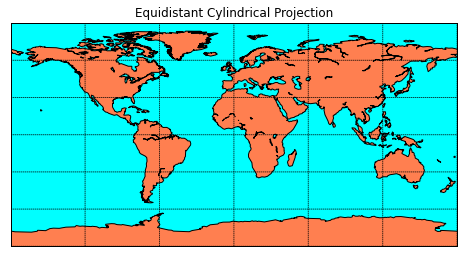

In [60]:
fig = plt.figure(figsize=(8, 8))
m1 = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
# 绘制海岸线
m1.drawcoastlines()
# 填充颜色（陆地和湖泊，不包括海洋）
m1.fillcontinents(color='coral',lake_color='aqua')
# 绘制参考线，方法中的**text_kwargs代表所绘制的平行|垂直参考线的位置
m1.drawparallels(np.arange(-90.,91.,30.))
m1.drawmeridians(np.arange(-180.,181.,60.))
# 填充边界颜色（海洋）
m1.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
plt.show()

## 2.2Polar Azimuthal Equidistant Projection
极方位等距投影

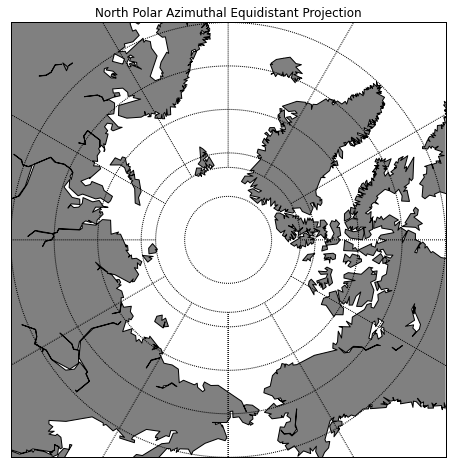

In [61]:
from matplotlib.patches import Polygon
fig = plt.figure(figsize=(8, 8))
# setup north polar aimuthal equidistant basemap.
# 经度 lon_0 与6点钟位置一致
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0.

m2 = Basemap(projection='npaeqd', boundinglat=60, lon_0=180,resolution='c')
m2.drawcoastlines()
m2.fillcontinents(color='gray',lake_color='white')
# draw parallels and meridians.
m2.drawparallels(np.arange(60.,90.,6.))
m2.drawmeridians(np.arange(-180.,181.,30.))
m2.drawmapboundary(fill_color='white')

plt.title("North Polar Azimuthal Equidistant Projection")
plt.show()

## 2.3 Orthographic Projection
正射投影

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


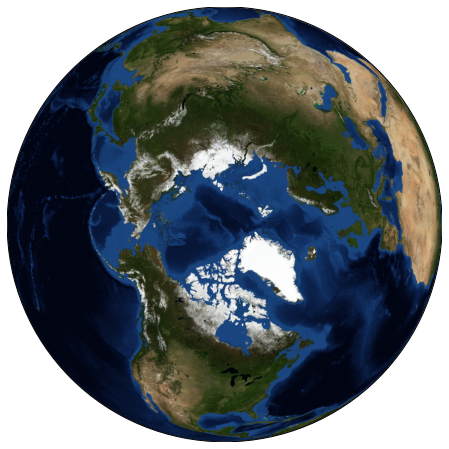

In [10]:
plt.figure(figsize=(8,8))

m3 = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=-90)
m3.bluemarble(scale = 0.5)

plt.show()

## 2.4 Lambert Conformal Projection
兰伯特正形投影

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(2347268.222744085, 4518079.266407731, ' Seattle')

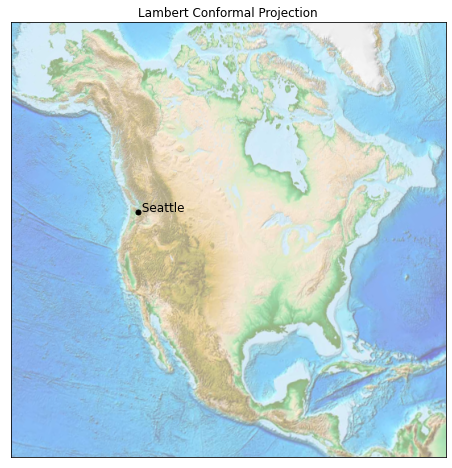

In [55]:
fig = plt.figure(figsize=(8, 8))
m4 = Basemap(projection='lcc', resolution=None,
           width = 8E6, height=8E6,
           lat_0=45, lon_0=-100)
m4.etopo(scale = 0.5,alpha=0.5)
x, y = m4(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.title('Lambert Conformal Projection')
plt.text(x, y, ' Seattle', fontsize=12)

## 2.5 Stereographic Projection
立体投影

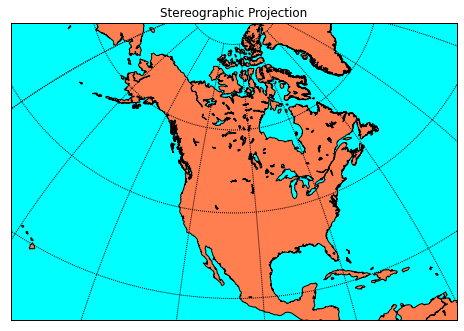

In [59]:
fig = plt.figure(figsize=(8, 8))
m5 = Basemap(width=12000000,height=8000000,
            resolution='l',projection='stere',\
            lat_ts=50,lat_0=50,lon_0=-107.)
m5.drawcoastlines()
m5.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m5.drawparallels(np.arange(-80.,81.,20.))
m5.drawmeridians(np.arange(-180.,181.,20.))
m5.drawmapboundary(fill_color='aqua')


plt.title("Stereographic Projection")
plt.show()

## 2.6 Polar Stereographic Projection
极方位立体投影

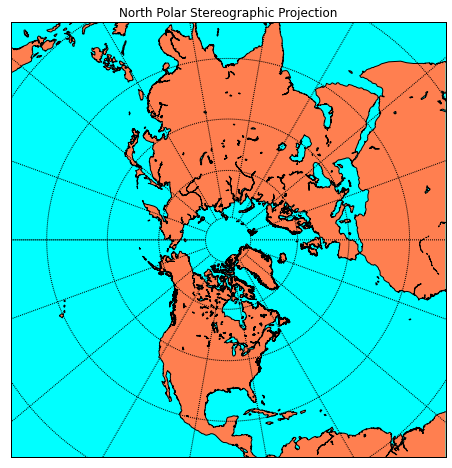

In [64]:
fig = plt.figure(figsize=(8, 8))
# setup north polar stereographic basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0. Default value of lat_ts
# (latitude of true scale) is pole.
m = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')


plt.title("North Polar Stereographic Projection")
plt.show()

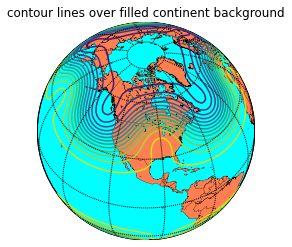

<Figure size 432x288 with 0 Axes>

In [10]:
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# 设置地图正射投影点为北纬50度， 西经100度，海岸线的分辨率为低
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
# 画出海岸线（描边）
map.drawcountries(linewidth=0.25)
# 画出国境线（描边）
map.fillcontinents(color='coral',lake_color='aqua')
# 填充大陆, 大陆颜色为珊瑚色， 湖泊颜色为水色
map.drawmapboundary(fill_color='aqua')
# 画出地图边界，海洋区域颜色为水色
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# 每三十度画出经纬度线
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# 在规则网格上填充数据
x, y = map(lons*180./np.pi, lats*180./np.pi)
#投影到球面上
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
# 以x,y为基准协调画出wave+mean的轮廓线， 轮廓线条数为15. 参数详情见
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.contour.html
plt.title('contour lines over filled continent background')
plt.show()
plt.savefig('contour lines over continent.jpg')

In [11]:
cnm = wave + mean